In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load haberman.csv into a pandas dataFrame. 
#Dataset dont have header So adding while reading the file
haberman = pd.read_csv("haberman.csv",names = ["PatientAge", "YearOfOperation", "AuxNodes", "SurvivalStatus"])

In [3]:
# How many datapoints and features are there, print the dataframe shape
print('Number of datapoints and features : ', haberman.shape)

Number of datapoints and features :  (306, 4)


In [4]:
# display the first 5 rows
haberman.head(5)

,PatientAge,YearOfOperation,AuxNodes,SurvivalStatus
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### Data Cleansing

In [5]:
# any nulls?
haberman.isnull().any()

PatientAge         False
YearOfOperation    False
AuxNodes           False
SurvivalStatus     False
dtype: bool

In [7]:
# Get the df description to understand it statistically
haberman.describe()

,PatientAge,YearOfOperation,AuxNodes,SurvivalStatus
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [8]:
# Find median
haberman.median()

PatientAge         52.0
YearOfOperation    63.0
AuxNodes            1.0
SurvivalStatus      1.0
dtype: float64

In [11]:
# Get the MAD Median absolute deviation
haberman.mad()

PatientAge         8.865180
YearOfOperation    2.787005
AuxNodes           4.790935
SurvivalStatus     0.389273
dtype: float64

In [15]:
# How many people survived >= 5 years
haberman['SurvivalStatus'].value_counts()
haberman['SurvivalStatus'].value_counts(normalize=True)

1    0.735294
2    0.264706
Name: SurvivalStatus, dtype: float64

In [18]:
# We'll divide the data into 2 dataframes based on survivial status
df_survived = haberman[haberman['SurvivalStatus'] == 1]
df_died = haberman[haberman['SurvivalStatus'] == 2]

In [23]:
print('survived >= 5 years : ', df_survived.describe())
print('died within 5 years : ', df_died.describe())

survived >= 5 years :         PatientAge  YearOfOperation    AuxNodes  SurvivalStatus
count  225.000000       225.000000  225.000000           225.0
mean    52.017778        62.862222    2.791111             1.0
std     11.012154         3.222915    5.870318             0.0
min     30.000000        58.000000    0.000000             1.0
25%     43.000000        60.000000    0.000000             1.0
50%     52.000000        63.000000    0.000000             1.0
75%     60.000000        66.000000    3.000000             1.0
max     77.000000        69.000000   46.000000             1.0
died within 5 years :         PatientAge  YearOfOperation   AuxNodes  SurvivalStatus
count   81.000000        81.000000  81.000000            81.0
mean    53.679012        62.827160   7.456790             2.0
std     10.167137         3.342118   9.185654             0.0
min     34.000000        58.000000   0.000000             2.0
25%     46.000000        59.000000   1.000000             2.0
50%     53.0000

### Data Visualization

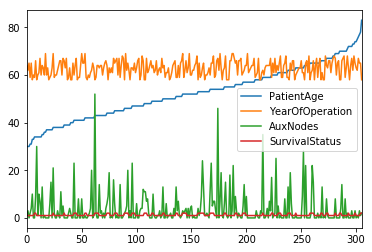

In [25]:
# Plot the dataframe
haberman.plot()
plt.show()

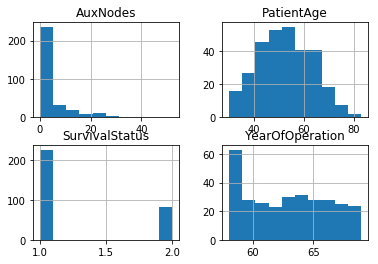

In [27]:
# the above visualization doesn't say much, so we'll plot a histogram
haberman.hist()
plt.show()

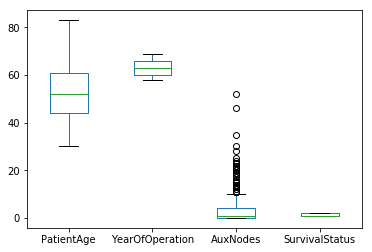

In [28]:
# Boxplot is useful to show the outliers
haberman.plot(kind="Box")
plt.show()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


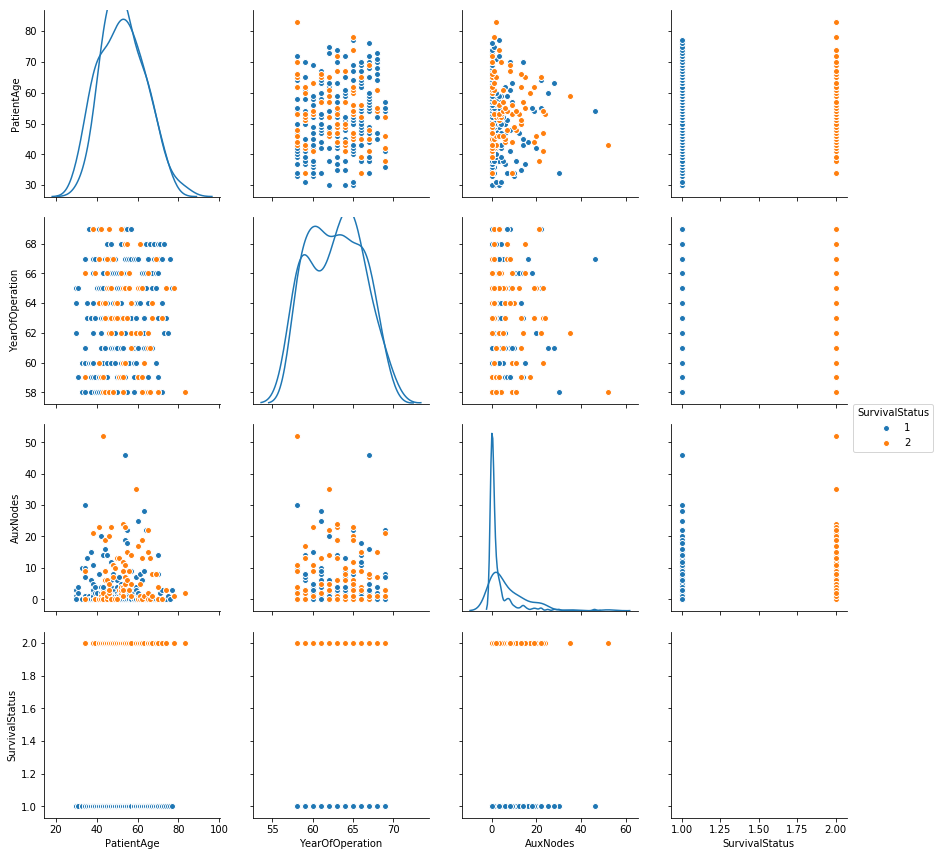

In [34]:
# Next we'll analyze the data using pairplot with respect to SurvivalStatus
sns.pairplot(haberman, hue="SurvivalStatus", size=3, diag_kind="kde");
plt.show();

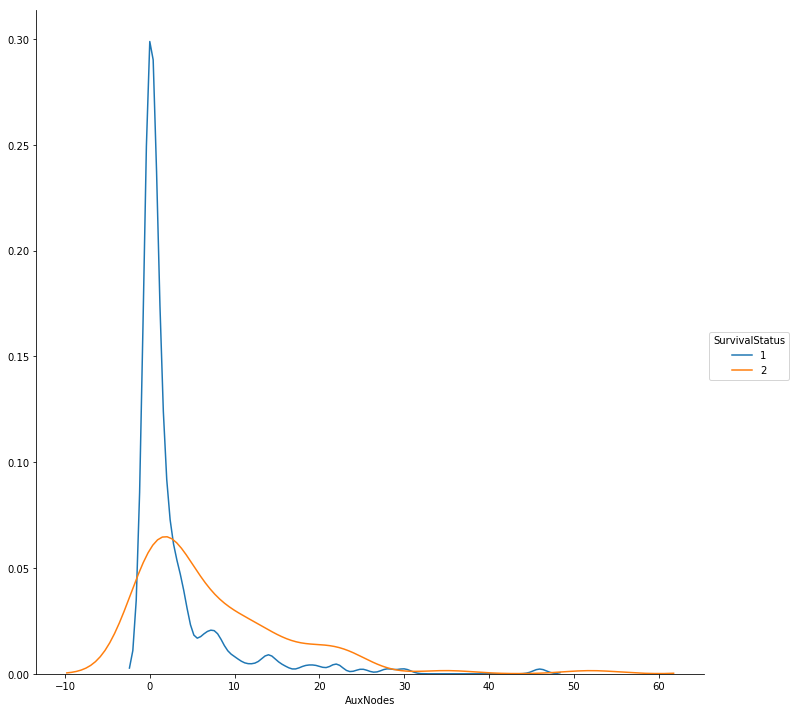

In [33]:
#Seaborn plot of AuxNodes's PDF.
sns.FacetGrid(haberman, hue="SurvivalStatus", size=10).map(sns.kdeplot, "AuxNodes").add_legend();
plt.show()

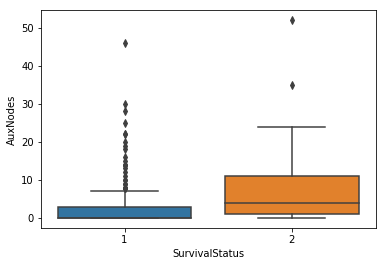

In [35]:
# Note the above graph is right skewed for both survival statuses, we'll remove the outliers and plot again
sns.boxplot(x="SurvivalStatus", y="AuxNodes", data=haberman);
plt.show()

In [36]:
# next lets calculate the IQR (Q3 - Q1)
df_iqr = haberman.quantile(0.75) - haberman.quantile(0.25)
print("IQR \n", df_iqr)

IQR 
 PatientAge         16.75
YearOfOperation     5.75
AuxNodes            4.00
SurvivalStatus      1.00
dtype: float64


In [37]:
aux_low_iqr = haberman['AuxNodes'].quantile(0.25) - (df_iqr['AuxNodes'] * 1.5)
aux_high_iqr = haberman['AuxNodes'].quantile(0.75) + (df_iqr['AuxNodes'] * 1.5)

print('Outlier < Q1 - 1.5*IQR \n ',aux_low_iqr )
print('Outlier > Q3 + 1.5*IQR \n ', aux_high_iqr)

Outlier < Q1 - 1.5*IQR 
  -6.0
Outlier > Q3 + 1.5*IQR 
  10.0


In [38]:
#Filter outliers exists in haberman data set
df_haberman_cleaned = haberman[(haberman['AuxNodes'] > aux_low_iqr) & (haberman['AuxNodes'] < aux_high_iqr)]
print('After removing outliers',df_haberman_cleaned.shape)

After removing outliers (263, 4)


In [39]:
#Outliers in Auxnodes
df_removed = haberman[(haberman['AuxNodes'] < aux_low_iqr) | \
                      (haberman['AuxNodes'] > aux_high_iqr)]
print('Removed data shape',df_removed.shape)

#we have removed 40 rows from the dataset.
df_removed

Removed data shape (40, 4)


,PatientAge,YearOfOperation,AuxNodes,SurvivalStatus
9,34,58,30,1
14,35,64,13,1
22,37,60,15,1
24,38,69,21,2
31,38,66,11,1
43,41,60,23,2
59,42,62,20,1
62,43,58,52,2
66,43,63,14,1
75,44,63,19,2


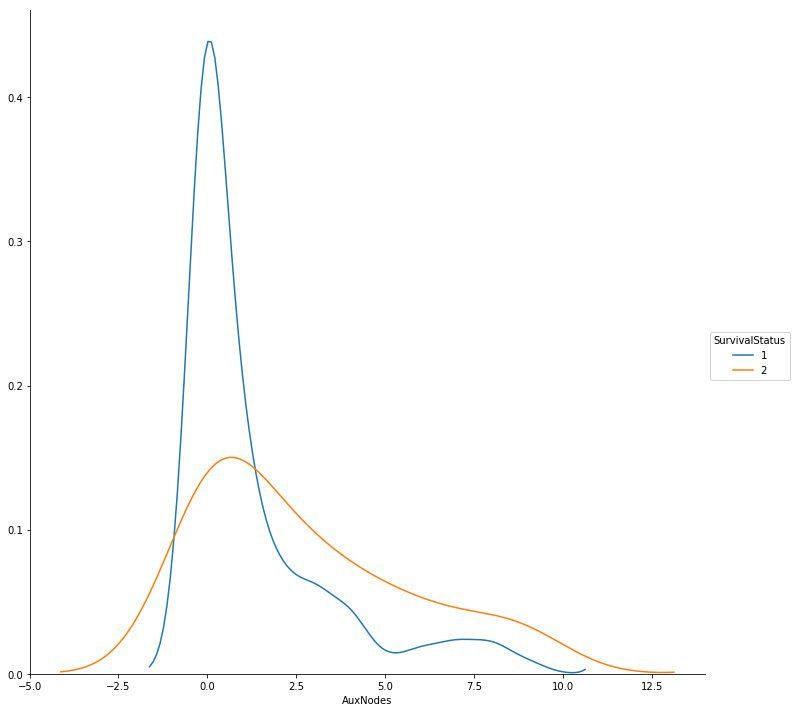

In [40]:
#Seaborn plot of AuxNodes's PDF.
sns.FacetGrid(df_haberman_cleaned, hue="SurvivalStatus", size=10).map(sns.kdeplot, "AuxNodes").add_legend();
plt.show();

### Conclusion
* Does age have an affect on survival status? No
* Does number of detected auxiliary nodes have an affect on post-op 5 year morality? Yes